In [26]:
import numpy as np
import matplotlib.pyplot as plt
import csv, datetime, random
import matplotlib.dates as mdates

def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1970, 2, day, int(h) - 3, int(m), int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

class Person:
    """
    Class to represent each individal poutfit being recorded during Deployment, made up of garments.
    """
    def __init__(
        self, wet:bool, Name:str, color:str,
        backneck:str,   back:str,        chest:str, 
        leftab:str,     rightab:str, 
        rightuparm:str, rightlowarm:str, 
        leftuparm:str,  leftlowarm:str, 
        beanie1:str,    beanie2:str,     beanie3:str, beanieR:str, beanieL:str
    ):
        self.Backneck    = backneck        # Tag ID's for the shirt
        self.Back        = back
        self.Chest       = chest
        self.Leftab      = leftab
        self.Rightab     = rightab
        self.Rightuparm  = rightuparm
        self.Rightlowarm = rightlowarm
        self.Leftuparm   = leftuparm
        self.Leftlowarm  = leftlowarm
        self.Beanie1     = beanie1         # Tag ID's for the beanies
        self.Beanie2     = beanie2
        self.Beanie3     = beanie3
        self.BeanieR     = beanieR
        self.BeanieL     = beanieL

        self.Name = Name                   # Soldier's Name

        self.ShirtMapping = {
            self.Backneck:    Name + " Back Neck",
            self.Back:        Name + " Back",
            self.Chest:       Name + " Chest",
            self.Leftab:      Name + " Left Abdomen",
            self.Rightab:     Name + " Right Abdomen",
            self.Rightuparm:  Name + " Right Upper Arm",
            self.Rightlowarm: Name + " Right Lower Arm",
            self.Leftlowarm:  Name + " Left Lower Arm",
            self.Leftuparm:   Name + " Left Upper Arm",
        }

        self.TagList = [
            self.Backneck,   self.Back, self.Chest,
            self.Leftab,     self.Rightab,
            self.Rightuparm, self.Rightlowarm,
            self.Leftuparm,  self.Leftlowarm,
            self.Beanie1,    self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL
        ]

        self.BeanieList = [self.Beanie1, self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL]
        self.Color = color

        self.wet = wet # Bool for wetness check
        if wet:
            self.BackColor = "#870101"
            self.BackNeckColor = "#ad4503"
            self.ChestColor = "#756a01"
            self.LeftAbColor = "#396102"
            self.RightAbColor = "#015c0b"
            self.LeftUpArmColor = "#01663f"
            self.RightUpArmColor = "#00a191"
            self.LeftLowArmColor = "#012173"
            self.RightLowArmColor = "#1e075e"
            
        else:
            self.BackColor = "#ff0d0d"
            self.BackNeckColor = "#ff7214"
            self.ChestColor = "#d1bc02"
            self.LeftAbColor = "#6bb803"
            self.RightAbColor = "#01bf16"
            self.LeftUpArmColor = "#03c278"
            self.RightUpArmColor = "#06b4cf"
            self.LeftLowArmColor = "#0443e0"
            self.RightLowArmColor = "#4c05e6"

if True:
    person6  = Person(True, "Pa. P.", "#de0514", "71BB", "7705", "B25E", "3247", "A9B5", "6C38", "7662", "A983", "098F", "B644", "7BCC", "B576", "70D1", "4D84");
    person14 = Person(True, "Jo.",    "#9e06a1", "462C", "5B60", "7415", "6310", "1851", "616A", "5DAA", "6D28", "9991", "3B0E", "5374", "682C", "0A50", "1543");
    person28 = Person(True, "Ga. C.", "#0909eb", "8977", "4EB3", "AA5E", "6626", "9ABE", "6CD0", "AB8E", "14AA", "6E94", "895D", "571F", "2D68", "8121", "198C");
    person2  = Person(True, "De.",    "#31e823", "333B", "289B", "2473", "231D", "9879", "4067", "5FB6", "169E", "8D50", "74C4", "73DC", "DC4A", "884D", "1BA4");
    person17 = Person(True, "Br. L.", "#e8c102", "6CC7", "8FB7", "799D", "6F8D", "6332", "5A1E", "92A5", "4A3D", "3EC9", "16AB", "A66C", "6162", "A686", "7E1B");

    person15 = Person(True, "Ja.",    "#0c028f", "9C54", "9968", "65E1", "5E23", "ACB3", "7AD3", "99A1", "B19D", "43C6", "7DCB", "9D35", "6FD0", "34CE", "62E3");
    person16 = Person(True, "Ma. C.", "#04822d", "959E", "1C5F", "5A59", "077A", "902A", "3B60", "8199", "4469", "813A", "B7A4", "5163", "4DA5", "8995", "7972");
    person13 = Person(True, "Wi. D.", "#f11de9", "A033", "A0C0", "892F", "627F", "6BD9", "3DB0", "8C97", "4ECF", "A73C", "90AE", "78D3", "82D8", "312D", "2A29");
    person32 = Person(True, "Se.",    "#b58e0d", "2990", "1EC3", "51E2", "3783", "AE5E", "4575", "0688", "A0B0", "1BA6", "3C3E", "1989", "7C2C", "42D7", "6129");
    person19 = Person(True, "Ha.",    "#023952", "697F", "78A5", "5D0E", "7EC6", "AE59", "8158", "4A9B", "1D44", "2122", "5C02", "2D90", "6DAB", "3374", "B1AB");
    person26 = Person(True, "Ka.",    "#1ab6f2", "4813", "2791", "1F7A", "6F4A", "2383", "2F66", "2E5C", "926A", "2E56", "158F", "5B06", "B28A", "73C6", "819C");

    person11 = Person(False, "Jackson Dry", "#3845ff", "2A1B", "238C", "731F", "9591", "5C98", "5F06", "4526", "461C", "5253", "B078", "3AC7", "566B", "65D4", "432B");
    person8  = Person(False, "Matt C. Dry", "#00ed4f", "1B6A", "0D42", "7AD4", "20AF", "493F", "404A", "6878", "1A3B", "546F", "194B", "3133", "A847", "0D50", "7A61");
    person10 = Person(False, "William D. Dry", "#ff3037", "366C", "A08B", "AC42", "9AC9", "B53F", "76A4", "5E76", "68AE", "41D6", "803F", "5757", "9E54", "----", "----");
    person31 = Person(False, "Sean Dry", "#fb24ff", "1CAE", "7764", "8F24", "AD3E", "8898", "413F", "097A", "18A8", "4258", "7F4E", "801E", "8651", "AAB4", "6CB5");
    person21 = Person(False, "Harold Dry", "#008dc9", "8CB4", "4115", "4D74", "4883", "4C9F", "ABB7", "7938", "390F", "21A5", "A697", "7C7D", "B689", "114D", "047A");
    person22 = Person(False, "Katherina Dry", "#ed8600", "4F0D", "90D5", "0874", "45CE", "6CAC", "3EB2", "A26F", "888C", "50C3", "3767", "664F", "36A4", "2759", "BB8B");

    t1 = MakeDataFromText("MWTC/trevor_test_1.txt")
    t2 = MakeDataFromText("MWTC/trevor_test_2.txt")
    t3 = MakeDataFromText("MWTC/trevor_test_3.txt")
    t4 = MakeDataFromText("MWTC/trevor_test_4.txt")
    t5 = MakeDataFromText("MWTC/trevor_test_5.txt")
    t6 = MakeDataFromText("MWTC/trevor_test_6.txt")
    t7 = MakeDataFromText("MWTC/trevor_test_7.txt")
    t8 = MakeDataFromText("MWTC/trevor_test_8.txt")
    y1 = MakeDataFromText("MWTC/yoel_test_1.txt")
    y2 = MakeDataFromText("MWTC/yoel_test_2.txt")
    y3 = MakeDataFromText("MWTC/yoel_test_3.txt")
    y4 = MakeDataFromText("MWTC/yoel_test_4.txt")

combined = dict()
for d in [t1, t2, t3, t4, t5, t6, t7, t8, y1, y2, y3, y4]:
    for k,v in d.items():
        if k in combined: # if tag is already in dict
            for i in range(len(v[0])):
                if v[0][i] in combined[k]:
                    combined[k][v[0][i]].append(v[1][i])
                else:
                    combined[k][v[0][i]] = [v[1][i]]
        else:             # if tag is not in dict
            combined[k] = dict()
            for i in range(len(v[0])):
                combined[k][v[0][i]] = [v[1][i]]
for k,v in combined.items():
    for k2,v2 in v.items():
        combined[k][k2] = sum(v2)/len(v2)

In [27]:
if True:
    back_time = []; back_avg = []
    neck_time = []; neck_avg = []
    chest_time = []; chest_avg = []
    leftab_time = []; leftab_avg = []
    rightab_time = []; rightab_avg = []
    leftuparm_time = []; leftuparm_avg = []
    rightuparm_time = []; rightuparm_avg = []
    leftlowarm_time = []; leftlowarm_avg = []
    rightlowarm_time = []; rightlowarm_avg = []
    beanie_time = []; beanie_avg = []

    bck_t2 = []; bck_a2 = []
    nck_t2 = []; nck_a2 = []
    cst_t2 = []; cst_a2 = []
    lab_t2 = []; lab_a2 = []
    rab_t2 = []; rab_a2 = []
    lua_t2 = []; lua_a2 = []
    rua_t2 = []; rua_a2 = []
    lla_t2 = []; lla_a2 = []
    rla_t2 = []; rla_a2 = []
    bne_t2 = []; bne_a2 = []

In [28]:
# personlist = [
#     person6, person14, person28, person17, person2, 
#     person15, person16, person13, person32, person19,
#     person26, 
# ]
# times = [
#     [datetime.datetime(1970, 2, 1, 7, 47, 0), datetime.datetime(1970, 2, 1, 8, 21, 0)],
#     [datetime.datetime(1970, 2, 1, 6, 45, 0), datetime.datetime(1970, 2, 1, 7, 15, 0)],
#     [datetime.datetime(1970, 2, 1, 8, 2, 0),  datetime.datetime(1970, 2, 1, 8, 40, 0)],
#     [datetime.datetime(1970, 2, 1, 7, 5, 0),  datetime.datetime(1970, 2, 1, 7, 40, 0)],
#     [datetime.datetime(1970, 2, 1, 7, 20, 0),datetime.datetime(1970, 2, 1, 7, 57, 0)],
#     [datetime.datetime(1970, 2, 1, 7, 51, 0),datetime.datetime(1970, 2, 1, 8, 18, 0)],
#     [datetime.datetime(1970, 2, 1, 7, 25, 0),datetime.datetime(1970, 2, 1, 7, 52, 0)],
#     [datetime.datetime(1970, 2, 1, 7, 30, 0),datetime.datetime(1970, 2, 1, 8, 5, 0)],
#     [datetime.datetime(1970, 2, 1, 7, 5, 0), datetime.datetime(1970, 2, 1, 7, 32, 0)],
#     [datetime.datetime(1970, 2, 1, 8, 2, 0), datetime.datetime(1970, 2, 1, 8, 32, 0)],
#     [datetime.datetime(1970, 2, 1, 6, 40, 0),datetime.datetime(1970, 2, 1, 7, 12, 0)],
# ]
# starts = [
#     datetime.datetime(1970, 2, 1, 8, 1, 0),
#     datetime.datetime(1970, 2, 1, 6, 55, 30),
#     datetime.datetime(1970, 2, 1, 8, 15, 0),
#     datetime.datetime(1970, 2, 1, 7, 14, 0),
#     datetime.datetime(1970, 2, 1, 7, 33, 0),
#     datetime.datetime(1970, 2, 1, 8, 1, 0),
#     datetime.datetime(1970, 2, 1, 7, 33, 0),
#     datetime.datetime(1970, 2, 1, 7, 47, 30),
#     datetime.datetime(1970, 2, 1, 7, 13, 0),
#     datetime.datetime(1970, 2, 1, 8, 13, 30),
#     datetime.datetime(1970, 2, 1, 6, 55, 20)
# ]

# Subject 1: 6:40 range 32, start=6:55, p2=7:17 range 17
# Subject 2: 6:40 range 32, start=6:55
# Subject 3: 7:05 range 34, start=7:14
# Subject 5: 7:51 range 29, start=8:01, p2=8:22 range 9
# Subject 6: 8:02 range 34, start=8:15
# Subject 7: 7:52 range 31, start=8:01

REAL_BEGIN = datetime.datetime(1970, 2, 1, 6, 40, 0)

p1 = person14
start = datetime.datetime(1970, 2, 1, 6, 55, 0)
times1 = [ REAL_BEGIN + datetime.timedelta(minutes=i) for i in range(32) ]

p2 = person22
times2 = [ datetime.datetime(1970, 2, 1, 7, 17, 0) + datetime.timedelta(minutes=i) for i in range(17) ]

for i in range(len(times1)-1):
    beanie = []
    for k,v in combined.items():
        s = sorted( v.items() )
        y = [j[1] for j in s if j[0]>times1[i] and j[0]<times1[i+1]]

        if k[-4:]==p1.Back:
            back_avg.append(np.mean(y))
        elif k[-4:]==p1.Chest:
            chest_avg.append(np.mean(y))
        elif k[-4:]==p1.Backneck:
            neck_avg.append(np.mean(y))
        elif k[-4:]==p1.Leftab:
            leftab_avg.append(np.mean(y))
        elif k[-4:]==p1.Rightab:
            rightab_avg.append(np.mean(y))
        elif k[-4:]==p1.Leftuparm:
            leftuparm_avg.append(np.mean(y))
        elif k[-4:]==p1.Rightuparm:
            rightuparm_avg.append(np.mean(y))
        elif k[-4:]==p1.Leftlowarm:
            leftlowarm_avg.append(np.mean(y))
        elif k[-4:]==p1.Rightlowarm:
            rightlowarm_avg.append(np.mean(y))
        elif k[-4:] in [p1.Beanie1, p1.Beanie2, p1.Beanie3, p1.BeanieL, p1.BeanieR]:
            beanie += y
    beanie_avg.append(np.mean(beanie))

for i in range(len(times2)-1):
    beanie = []
    for k,v in combined.items():
        s = sorted( v.items() )
        y = [j[1] for j in s if j[0]>times2[i] and j[0]<times2[i+1]]

        if k[-4:]==p2.Back:
            bck_a2.append(np.mean(y))
        elif k[-4:]==p2.Chest:
            cst_a2.append(np.mean(y))
        elif k[-4:]==p2.Backneck:
            nck_a2.append(np.mean(y))
        elif k[-4:]==p2.Leftab:
            lab_a2.append(np.mean(y))
        elif k[-4:]==p2.Rightab:
            rab_a2.append(np.mean(y))
        elif k[-4:]==p2.Leftuparm:
            lua_a2.append(np.mean(y))
        elif k[-4:]==p2.Rightuparm:
            rua_a2.append(np.mean(y))
        elif k[-4:]==p2.Leftlowarm:
            lla_a2.append(np.mean(y))
        elif k[-4:]==p2.Rightlowarm:
            rla_a2.append(np.mean(y))
        elif k[-4:] in [p2.Beanie1, p2.Beanie2, p2.Beanie3, p2.BeanieL, p2.BeanieR]:
            beanie += y
    bne_a2.append(np.mean(beanie))

In [29]:
def ChopAndInterp(data):
    try:
        ind = np.where( [np.isnan(data[i]) for i in range(len(data))] )[0]
        x,y = [],[]
        for i in range(len(data)):
            if not np.isnan(data[i]):
                x.append(i)
                y.append(data[i])

        ips = np.interp(ind, x, y)

        new_data = data
        for i,j in zip(ind, ips):
            new_data[i] = j
            
        return new_data
    except:
        return []

def Get_Inds(data):
    ind1, ind2, ind3 = [], [], []
    for i in range(len(data)):
        if not np.isnan(data[i]):
            if times1[i]>=start and times1[i]<=start+datetime.timedelta(minutes=10):
                ind2.append(i)
            if times1[i]<=start:
                ind1.append(i)
            if times1[i]>=start+datetime.timedelta(minutes=10):
                ind3.append(i)

    i2, i3 = [], []

    for i in range(len(ind2)):
        numline = list(range(ind2[0], ind2[-1]+1))
        i2.append(numline.index(ind2[i]))
    
    for i in range(len(ind3)):
        # numline = list(range(ind3[0], ind3[-1]+1))
        numline = list(range(ind3[0], 100))
        i3.append(numline.index(ind3[i]))

    return np.array(ind1), np.array(i2), np.array(i3)

def Get_NotInds(data):
    ind1, ind2, ind3 = [], [], []
    for i in range(len(data)):
        if np.isnan(data[i]):
            if times1[i]>=start and times1[i]<=start+datetime.timedelta(minutes=10):
                ind2.append(i)
            if times1[i]<=start:
                ind1.append(i)
            if times1[i]>=start+datetime.timedelta(minutes=10):
                ind3.append(i)

    i2, i3 = [], []

    for i in range(len(ind2)):
        numline = list(range(ind2[0], ind2[-1]+1))
        i2.append(numline.index(ind2[i]))
    
    for i in range(len(ind3)):
        numline = list(range(ind3[0], 100))
        i3.append(numline.index(ind3[i]))

    return np.array(ind1), np.array(i2), np.array(i3)

def Segregate(data):
    dashed_x, dashed_y = [], []
    filled_x1, filled_y1 = [], []
    filled_x2, filled_y2 = [], []
    for i in range(len(data)):
        if not np.isnan(data[i]):
            if times1[i] >= start and times1[i] <= start + datetime.timedelta(minutes=10):
                dashed_x.append(times1[i])
                dashed_y.append(data[i])
            if times1[i] <= start:
                filled_x1.append(times1[i])
                filled_y1.append(data[i])
            if times1[i] >= start + datetime.timedelta(minutes=10):
                filled_x2.append(times1[i])
                filled_y2.append(data[i])
    return dashed_x, dashed_y, filled_x1, filled_y1, filled_x2, filled_y2

def Get_Inds_Person2(data):
    return np.where([not np.isnan(data[i]) for i in range(len(data))])[0], np.where([np.isnan(data[i]) for i in range(len(data))])[0]


###############################
#### PERSON 1 CALCULATIONS ####
###############################

if True:
    back_ind1, back_ind2, back_ind3                      = Get_Inds(back_avg)
    neck_ind1, neck_ind2, neck_ind3                      = Get_Inds(neck_avg)
    chest_ind1, chest_ind2, chest_ind3                   = Get_Inds(chest_avg)
    leftab_ind1, leftab_ind2, leftab_ind3                = Get_Inds(leftab_avg)
    rightab_ind1, rightab_ind2, rightab_ind3             = Get_Inds(rightab_avg)
    leftuparm_ind1, leftuparm_ind2, leftuparm_ind3       = Get_Inds(leftuparm_avg)
    rightuparm_ind1, rightuparm_ind2, rightuparm_ind3    = Get_Inds(rightuparm_avg)
    leftlowarm_ind1, leftlowarm_ind2, leftlowarm_ind3    = Get_Inds(leftlowarm_avg)
    rightlowarm_ind1, rightlowarm_ind2, rightlowarm_ind3 = Get_Inds(rightlowarm_avg)
    beanie_ind1, beanie_ind2, beanie_ind3                = Get_Inds(beanie_avg)

    back_ni1, back_ni2, back_ni3                      = Get_NotInds(back_avg)
    neck_ni1, neck_ni2, neck_ni3                      = Get_NotInds(neck_avg)
    chest_ni1, chest_ni2, chest_ni3                   = Get_NotInds(chest_avg)
    leftab_ni1, leftab_ni2, leftab_ni3                = Get_NotInds(leftab_avg)
    rightab_ni1, rightab_ni2, rightab_ni3             = Get_NotInds(rightab_avg)
    leftuparm_ni1, leftuparm_ni2, leftuparm_ni3       = Get_NotInds(leftuparm_avg)
    rightuparm_ni1, rightuparm_ni2, rightuparm_ni3    = Get_NotInds(rightuparm_avg)
    leftlowarm_ni1, leftlowarm_ni2, leftlowarm_ni3    = Get_NotInds(leftlowarm_avg)
    rightlowarm_ni1, rightlowarm_ni2, rightlowarm_ni3 = Get_NotInds(rightlowarm_avg)
    beanie_ni1, beanie_ni2, beanie_ni3                = Get_NotInds(beanie_avg)

    back_a        = ChopAndInterp(back_avg)
    neck_a        = ChopAndInterp(neck_avg)
    chest_a       = ChopAndInterp(chest_avg)
    leftab_a      = ChopAndInterp(leftab_avg)
    rightab_a     = ChopAndInterp(rightab_avg)
    leftuparm_a   = ChopAndInterp(leftuparm_avg)
    rightuparm_a  = ChopAndInterp(rightuparm_avg)
    leftlowarm_a  = ChopAndInterp(leftlowarm_avg)
    rightlowarm_a = ChopAndInterp(rightlowarm_avg)
    beanie_a      = ChopAndInterp(beanie_avg)

# print(back_a)
print(np.where( [np.isnan(leftuparm_avg) for i in range(len(leftuparm_avg))] )[0])
print(leftuparm_ind1, leftuparm_ind2, leftuparm_ind3)
print(leftuparm_ni1, leftuparm_ni2, leftuparm_ni3)

###############################
#### PERSON 2 CALCULATIONS ####
###############################

if True:
    bne_i2, bne_n2 = Get_Inds_Person2(bne_a2)
    bck_i2, bck_n2 = Get_Inds_Person2(bck_a2)
    nck_i2, nck_n2 = Get_Inds_Person2(nck_a2)
    cst_i2, cst_n2 = Get_Inds_Person2(cst_a2)
    lua_i2, lua_n2 = Get_Inds_Person2(lua_a2)
    rua_i2, rua_n2 = Get_Inds_Person2(rua_a2)
    lla_i2, lla_n2 = Get_Inds_Person2(lla_a2)
    rla_i2, rla_n2 = Get_Inds_Person2(rla_a2)
    lab_i2, lab_n2 = Get_Inds_Person2(lab_a2)
    rab_i2, rab_n2 = Get_Inds_Person2(rab_a2)

    nck_a2 = ChopAndInterp(nck_a2)
    cst_a2 = ChopAndInterp(cst_a2)
    lua_a2 = ChopAndInterp(lua_a2)
    rua_a2 = ChopAndInterp(rua_a2)
    lla_a2 = ChopAndInterp(lla_a2)
    rla_a2 = ChopAndInterp(rla_a2)
    lab_a2 = ChopAndInterp(lab_a2)
    rab_a2 = ChopAndInterp(rab_a2)
    bck_a2 = ChopAndInterp(bck_a2)
    bne_a2 = ChopAndInterp(bne_a2)

[]
[ 2  3 10 11 12 13 14] [] [0 1]
[ 0  1  4  5  6  7  8  9 15] [ 0  1  2  3  4  5  6  7  8  9 10] [0 1 2 5]


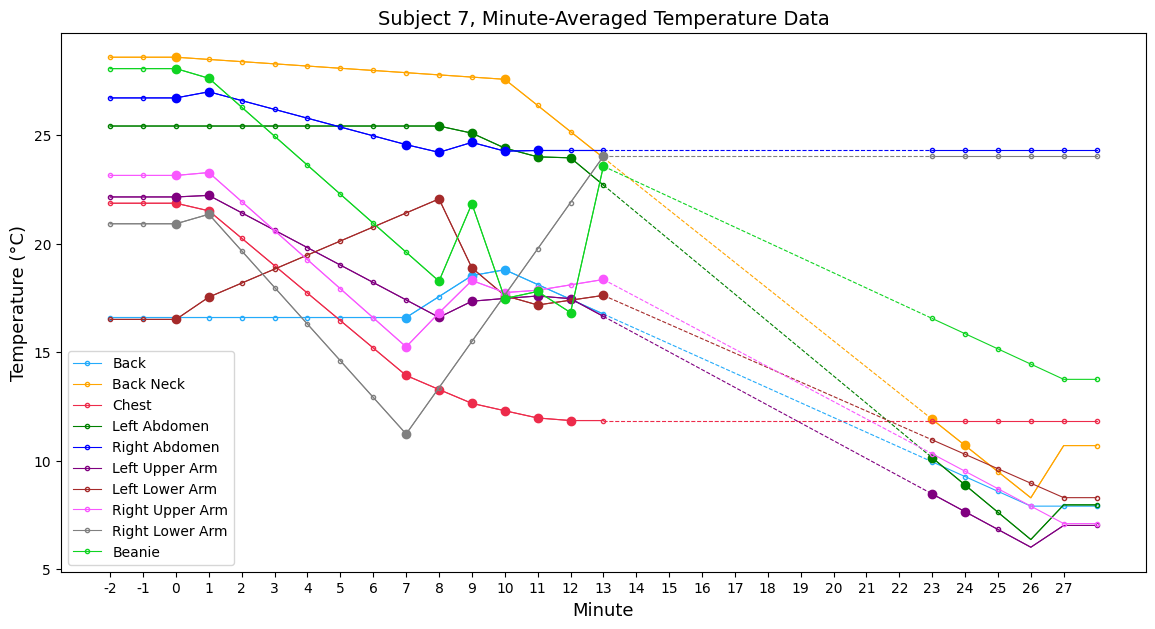

In [30]:
# PLOTTING CODE
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

colors = {
    "Back": "#24abfb",
    "Back Neck": "orange",
    "Chest": "#ed2b4b",
    "Left Abdomen": "green",
    "Right Abdomen": "blue",
    "Left Upper Arm": "purple",
    "Right Upper Arm": "#f957ff",
    "Left Lower Arm": "brown",
    "Right Lower Arm": "grey",
    "Beanie": "#0fd422"
}


###########################
#### PERSON 1 PLOTTING ####
###########################

t1, d1, t2, d2, t3, d3 = Segregate(back_a)
ax.plot(t1, d1, label="Back", color=colors["Back"], linewidth=0.795, linestyle="--")
if not any(back_ind1):
    ax.plot(t2, d2, label="Back", color=colors["Back"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t2, d2, label="Back", color=colors["Back"], marker="o", linewidth=0.795, markevery=back_ind1)
    ax.plot(t2, d2, label="Back", color=colors["Back"], marker="o", markevery=back_ni1, linewidth=0.795, markerfacecolor="none", markersize=3)
if not any(back_ind3):
    ax.plot(t3, d3, label="Back", color=colors["Back"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t3, d3, label="Back", color=colors["Back"], marker="o", linewidth=0.795, markevery=back_ind3)
    ax.plot(t3, d3, label="Back", color=colors["Back"], marker="o", linewidth=0.795, markevery=back_ni3, markerfacecolor="none", markersize=3)

t1, d1, t2, d2, t3, d3 = Segregate(neck_a)
ax.plot(t1, d1, label="Back Neck", color=colors["Back Neck"], linewidth=0.795, linestyle="--")
if not any(neck_ind1):
    ax.plot(t2, d2, label="Back Neck", color=colors["Back Neck"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
else:
    ax.plot(t2, d2, label="Back Neck", color=colors["Back Neck"], linewidth=0.795, marker="o", markevery=neck_ind1)
    ax.plot(t2, d2, label="Back Neck", color=colors["Back Neck"], linewidth=0.795, marker="o", markevery=neck_ni1, markerfacecolor="none", markersize=3)
if not any(neck_ind3):
    ax.plot(t3, d3, label="Back Neck", color=colors["Back Neck"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t3, d3, label="Back Neck", color=colors["Back Neck"], marker="o", linewidth=0.795, markevery=neck_ind3)
    ax.plot(t3, d3, label="Back Neck", color=colors["Back Neck"], marker="o", linewidth=0.795, markevery=neck_ni3, markerfacecolor="none", markersize=3)

t1, d1, t2, d2, t3, d3 = Segregate(chest_a)
ax.plot(t1, d1, label="Chest", color=colors["Chest"], linewidth=0.795, linestyle="--")
if not any(chest_ind1):
    ax.plot(t2, d2, label="Chest", color=colors["Chest"], marker="o", markerfacecolor="none", linewidth=0.795, markersize=3)
else:
    ax.plot(t2, d2, label="Chest", color=colors["Chest"], marker="o", markevery=chest_ind1, linewidth=0.795)
    ax.plot(t2, d2, label="Chest", color=colors["Chest"], marker="o", markevery=chest_ni1, markerfacecolor="none", markersize=3, linewidth=0.795)
if not any(chest_ind3):
    ax.plot(t3, d3, label="Chest", color=colors["Chest"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t3, d3, label="Chest", color=colors["Chest"], marker="o", linewidth=0.795, markevery=chest_ind3)
    ax.plot(t3, d3, label="Chest", color=colors["Chest"], marker="o", linewidth=0.795, markevery=chest_ni3, markerfacecolor="none", markersize=3)

t1, d1, t2, d2, t3, d3 = Segregate(leftab_a)
ax.plot(t1, d1, label="Left Abdomen", color=colors["Left Abdomen"], linewidth=0.795, linestyle="--")
if not any(leftab_ind1):
    ax.plot(t2, d2, label="Left Abdomen", color=colors["Left Abdomen"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
else:
    ax.plot(t2, d2, label="Left Abdomen", color=colors["Left Abdomen"], linewidth=0.795, marker="o", markevery=leftab_ind1)
    ax.plot(t2, d2, label="Left Abdomen", color=colors["Left Abdomen"], linewidth=0.795, marker="o", markevery=leftab_ni1, markerfacecolor="none", markersize=3)
if not any(leftab_ind3):
    ax.plot(t3, d3, label="Left Abdomen", color=colors["Left Abdomen"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t3, d3, label="Left Abdomen", color=colors["Left Abdomen"], marker="o", linewidth=0.795, markevery=leftab_ind3)
    ax.plot(t3, d3, label="Left Abdomen", color=colors["Left Abdomen"], marker="o", linewidth=0.795, markevery=leftab_ni3, markerfacecolor="none", markersize=3)

t1, d1, t2, d2, t3, d3 = Segregate(rightab_a) 
ax.plot(t1, d1, label="Right Abdomen", color=colors["Right Abdomen"], linewidth=0.795, linestyle="--")
if not any(rightab_ind1):
    ax.plot(t2, d2, label="Right Abdomen", color=colors["Right Abdomen"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
else:
    ax.plot(t2, d2, label="Right Abdomen", color=colors["Right Abdomen"], linewidth=0.795, marker="o", markevery=rightab_ind1)
    ax.plot(t2, d2, label="Right Abdomen", color=colors["Right Abdomen"], linewidth=0.795, marker="o", markevery=rightab_ni1, markerfacecolor="none", markersize=3)
if not any(rightab_ind3):
    ax.plot(t3, d3, label="Right Abdomen", color=colors["Right Abdomen"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t3, d3, label="Right Abdomen", color=colors["Right Abdomen"], marker="o", linewidth=0.795, markevery=rightab_ind3)
    ax.plot(t3, d3, label="Right Abdomen", color=colors["Right Abdomen"], marker="o", linewidth=0.795, markevery=rightab_ni3, markerfacecolor="none", markersize=3)

t1, d1, t2, d2, t3, d3 = Segregate(leftuparm_a)
ax.plot(t1, d1, label="Left Upper Arm", color=colors["Left Upper Arm"], linewidth=0.795, linestyle="--")
if not any(leftuparm_ind1):
    ax.plot(t2, d2, label="Left Upper Arm", color=colors["Left Upper Arm"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
else:
    ax.plot(t2, d2, label="Left Upper Arm", color=colors["Left Upper Arm"], linewidth=0.795, marker="o", markevery=leftuparm_ind1)
    ax.plot(t2, d2, label="Left Upper Arm", color=colors["Left Upper Arm"], linewidth=0.795, marker="o", markevery=leftuparm_ni1, markerfacecolor="none", markersize=3)
if not any(leftuparm_ind3):
    ax.plot(t3, d3, label="Left Upper Arm", color=colors["Left Upper Arm"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t3, d3, label="Left Upper Arm", color=colors["Left Upper Arm"], marker="o", linewidth=0.795, markevery=leftuparm_ind3)
    ax.plot(t3, d3, label="Left Upper Arm", color=colors["Left Upper Arm"], marker="o", linewidth=0.795, markevery=leftuparm_ni3, markerfacecolor="none", markersize=3)

t1, d1, t2, d2, t3, d3 = Segregate(leftlowarm_a)
ax.plot(t1, d1, label="Left Lower Arm", color=colors["Left Lower Arm"], linewidth=0.795, linestyle="--")
if not any(leftlowarm_ind1):
    ax.plot(t2, d2, label="Left Lower Arm", color=colors["Left Lower Arm"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
else:
    ax.plot(t2, d2, label="Left Lower Arm", color=colors["Left Lower Arm"], linewidth=0.795, marker="o", markevery=leftlowarm_ind1)
    ax.plot(t2, d2, label="Left Lower Arm", color=colors["Left Lower Arm"], linewidth=0.795, marker="o", markevery=leftlowarm_ni1, markerfacecolor="none", markersize=3)
if not any(leftlowarm_ind3):
    ax.plot(t3, d3, label="Left Lower Arm", color=colors["Left Lower Arm"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t3, d3, label="Left Lower Arm", color=colors["Left Lower Arm"], marker="o", linewidth=0.795, markevery=leftlowarm_ind3)
    ax.plot(t3, d3, label="Left Lower Arm", color=colors["Left Lower Arm"], marker="o", linewidth=0.795, markevery=leftlowarm_ni3, markerfacecolor="none", markersize=3)

t1, d1, t2, d2, t3, d3 = Segregate(rightuparm_a)
ax.plot(t1, d1, label="Right Upper Arm", color=colors["Right Upper Arm"], linewidth=0.795, linestyle="--")
if not any(rightuparm_ind1):
    ax.plot(t2, d2, label="Right Upper Arm", color=colors["Right Upper Arm"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
else:
    ax.plot(t2, d2, label="Right Upper Arm", color=colors["Right Upper Arm"], linewidth=0.795, marker="o", markevery=rightuparm_ind1)
    ax.plot(t2, d2, label="Right Upper Arm", color=colors["Right Upper Arm"], linewidth=0.795, marker="o", markevery=rightuparm_ni1, markerfacecolor="none", markersize=3)
if not any(rightuparm_ind3):
    ax.plot(t3, d3, label="Right Upper Arm", color=colors["Right Upper Arm"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t3, d3, label="Right Upper Arm", color=colors["Right Upper Arm"], marker="o", linewidth=0.795, markevery=rightuparm_ind3)
    ax.plot(t3, d3, label="Right Upper Arm", color=colors["Right Upper Arm"], marker="o", linewidth=0.795, markevery=rightuparm_ni3, markerfacecolor="none", markersize=3)

t1, d1, t2, d2, t3, d3 = Segregate(rightlowarm_a)
ax.plot(t1, d1, label="Right Lower Arm", color=colors["Right Lower Arm"], linewidth=0.795, linestyle="--")
if not any(rightlowarm_ind1):
    ax.plot(t2, d2, label="Right Lower Arm", color=colors["Right Lower Arm"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
else:
    ax.plot(t2, d2, label="Right Lower Arm", color=colors["Right Lower Arm"], linewidth=0.795, marker="o", markevery=rightlowarm_ind1)
    ax.plot(t2, d2, label="Right Lower Arm", color=colors["Right Lower Arm"], linewidth=0.795, marker="o", markevery=rightlowarm_ni1, markerfacecolor="none", markersize=3)
if not any(rightlowarm_ind3):
    ax.plot(t3, d3, label="Right Lower Arm", color=colors["Right Lower Arm"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t3, d3, label="Right Lower Arm", color=colors["Right Lower Arm"], marker="o", linewidth=0.795, markevery=rightlowarm_ind3)
    ax.plot(t3, d3, label="Right Lower Arm", color=colors["Right Lower Arm"], marker="o", linewidth=0.795, markevery=rightlowarm_ni3, markerfacecolor="none", markersize=3)

t1, d1, t2, d2, t3, d3 = Segregate(beanie_a)
ax.plot(t1, d1, label="Beanie", color=colors["Beanie"], linewidth=0.795, linestyle="--")
if not any(beanie_ind1):
    ax.plot(t2, d2, label="Beanie", color=colors["Beanie"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
else:
    ax.plot(t2, d2, label="Beanie", color=colors["Beanie"], marker="o", linewidth=0.795, markevery=beanie_ind1)
    ax.plot(t2, d2, label="Beanie", color=colors["Beanie"], marker="o", linewidth=0.795, markevery=beanie_ni1, markerfacecolor="none", markersize=3)
if not any(beanie_ind3):
    ax.plot(t3, d3, label="Beanie", color=colors["Beanie"], marker="o", linewidth=0.795, markerfacecolor="none", markersize=3)
else:
    ax.plot(t3, d3, label="Beanie", color=colors["Beanie"], marker="o", linewidth=0.795, markevery=beanie_ind3)
    ax.plot(t3, d3, label="Beanie", color=colors["Beanie"], marker="o", linewidth=0.795, markevery=beanie_ni3, markerfacecolor="none", markersize=3)


###########################
#### PERSON 2 PLOTTING ####
###########################

# if not any(rua_i2):
#     ax.plot(times2[:-1], rua_a2, color=colors["Right Upper Arm"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
# else:
#     ax.plot(times2[:-1], rua_a2, label="Right Upper Arm", color=colors["Right Upper Arm"], marker="o", linewidth=0.795, markevery=rua_i2)
#     ax.plot(times2[:-1], rua_a2, label="Right Upper Arm", color=colors["Right Upper Arm"], marker="o", linewidth=0.795, markevery=rua_n2, markerfacecolor="none", markersize=3)

# if not any(cst_i2):
#     ax.plot(times2[:-1], cst_a2, color=colors["Chest"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
# else:
#     ax.plot(times2[:-1], cst_a2, label="Chest", color=colors["Chest"], marker="o", linewidth=0.795, markevery=cst_i2)
#     ax.plot(times2[:-1], cst_a2, label="Chest", color=colors["Chest"], marker="o", linewidth=0.795, markevery=cst_n2, markerfacecolor="none", markersize=3)

# if not any(bck_i2):
#     ax.plot(times2[:-1], bck_a2, color=colors["Back"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
# else:
#     ax.plot(times2[:-1], bck_a2, label="Back", color=colors["Back"], marker="o", linewidth=0.795, markevery=bck_i2)
#     ax.plot(times2[:-1], bck_a2, label="Back", color=colors["Back"], marker="o", linewidth=0.795, markevery=bck_n2, markerfacecolor="none", markersize=3)

# if not any(lua_i2):
#     ax.plot(times2[:-1], lua_a2, color=colors["Left Upper Arm"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
# else:
#     ax.plot(times2[:-1], lua_a2, label="Left Upper Arm", color=colors["Left Upper Arm"], marker="o", linewidth=0.795, markevery=lua_i2)
#     ax.plot(times2[:-1], lua_a2, label="Left Upper Arm", color=colors["Left Upper Arm"], marker="o", linewidth=0.795, markevery=lua_n2, markerfacecolor="none", markersize=3)

# if not any(rla_i2):
#     ax.plot(times2[:-1], rla_a2, color=colors["Right Lower Arm"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
# else:
#     ax.plot(times2[:-1], rla_a2, label="Right Lower Arm", color=colors["Right Lower Arm"], marker="o", linewidth=0.795, markevery=rla_i2)
#     ax.plot(times2[:-1], rla_a2, label="Right Lower Arm", color=colors["Right Lower Arm"], marker="o", linewidth=0.795, markevery=rla_n2, markerfacecolor="none", markersize=3)

# if not any(bne_i2):
#     ax.plot(times2[:-1], bne_a2, color=colors["Beanie"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
# else:
#     ax.plot(times2[:-1], bne_a2, label="Beanie", color=colors["Beanie"], marker="o", linewidth=0.795, markevery=bne_i2)
#     ax.plot(times2[:-1], bne_a2, label="Beanie", color=colors["Beanie"], marker="o", linewidth=0.795, markevery=bne_n2, markerfacecolor="none", markersize=3)

# if not any(lla_i2):
#     ax.plot(times2[:-1], lla_a2, color=colors["Left Lower Arm"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
# else:
#     ax.plot(times2[:-1], lla_a2, label="Left Lower Arm", color=colors["Left Lower Arm"], marker="o", linewidth=0.795, markevery=lla_i2)
#     ax.plot(times2[:-1], lla_a2, label="Left Lower Arm", color=colors["Left Lower Arm"], marker="o", linewidth=0.795, markevery=lla_n2, markerfacecolor="none", markersize=3)

# if not any(lab_i2):
#     ax.plot(times2[:-1], lab_a2, color=colors["Left Abdomen"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
# else:
#     ax.plot(times2[:-1], lab_a2, label="Left Abdomen", color=colors["Left Abdomen"], marker="o", linewidth=0.795, markevery=lab_i2)
#     ax.plot(times2[:-1], lab_a2, label="Left Abdomen", color=colors["Left Abdomen"], marker="o", linewidth=0.795, markevery=lab_n2, markerfacecolor="none", markersize=3)

# if not any(rab_i2):
#     ax.plot(times2[:-1], rab_a2, color=colors["Right Abdomen"], linewidth=0.795, marker="o", markerfacecolor="none", markersize=3)
# else:
#     ax.plot(times2[:-1], rab_a2, label="Right Abdomen", color=colors["Right Abdomen"], marker="o", linewidth=0.795, markevery=rab_i2)
#     ax.plot(times2[:-1], rab_a2, label="Right Abdomen", color=colors["Right Abdomen"], marker="o", linewidth=0.795, markevery=rab_n2, markerfacecolor="none", markersize=3)


ax.set_title("Subject 7, Minute-Averaged Temperature Data", fontsize=14)
ax.set_xlabel("Minute", fontsize=13)
ax.set_ylabel("Temperature (°C)", fontsize=13)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend( by_label.values(), by_label.keys() )

NUM = 30
ax.set_xticks(
    [REAL_BEGIN + datetime.timedelta(minutes=i) for i in range(NUM)],
    [str(i-2) for i in range(NUM)]
);